# Applying a Median Filter on SN Spectra

We demonstrate the application of a median filter to spectra taken by SDSS and CSP. We consider a range of classified objects and different window sizes for the applied filter.


In [1]:
from matplotlib import pyplot as plt
from sndata.csp import DR1
from sndata.sdss import Sako18Spec
from scipy.ndimage import median_filter


In [2]:
dr1 = DR1()
dr1.download_module_data()

sako18spec = Sako18Spec()
sako18spec.download_module_data()


In [3]:
def plot_helper(data, window_size):
    """Plot a spectrum with an applied median filter 
    
    Args:
        data      (Table): Data to use when creating the plot
        window_size (int): Size of the median filter to use
    """
    
    filtered_flux = median_filter(data['flux'], size=window_size)
    plt.plot(data['wavelength'], data['flux'])
    plt.plot(data['wavelength'], filtered_flux)
    plt.xlabel('Wavelength (Å)')
    plt.ylabel('Flux (mag)')
    plt.title(f'Object {obj_id}')


In [4]:
def plot_sdss_spectrum(obj_id, spec_type, window_size=10, time=None):
    """Plot an SDSS spectrum with an applied median filter 
    
    Args:
        obj_id      (str): ID for the object to plot
        spec_type   (str): Type of spectrum to plot (either `gal` or `sn`)
        window_size (int): Size of the median filter to use
        time      (float): Optionally only plot data observed at the given time 
    """

    data = sako18spec.get_data_for_id(obj_id)
    avail_spec = set(data['type'])
    
    if spec_type == 'gal':
        data = data[data['type'] == 'Gal']
        
    elif spec_type == 'sn':
        data = data[data['type'] != 'Gal']
        
    else:
        raise ValueError('`spec_type` must be `gal` or `sn`.')
        
    if time:
        data = data[data['time'] == time]
    
    master = sako18spec.load_table('master')
    print('Object type:', master[master['CID'] == obj_id]['Classification'][0])
    print('Available Spectra:', avail_spec)
    
    plot_helper(data, window_size)


In [5]:
def plot_csp_spectrum(obj_id, window_size=10, time=None):
    """Plot an SDSS spectrum with an applied median filter 
    
    Args:
        obj_id      (str): ID for the object to plot
        spec_type   (str): Type of spectrum to plot (either `gal` or `sn`)
        window_size (int): Size of the median filter to use
        time      (float): Optionally only plot data observed at the given time 
    """
        
    data = dr1.get_data_for_id(obj_id)
    if time:
        data = data[data['time'] == time]
        
    plot_helper(data, window_size)


## SDSS Host Galaxies


Object type: Unknown
Available Spectra: {'Gal'}


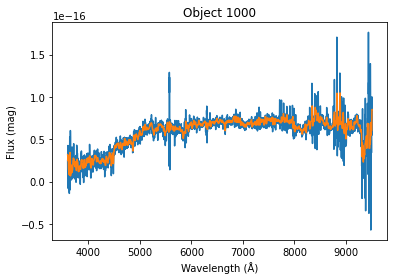

Object type: zSNIa
Available Spectra: {'Gal'}


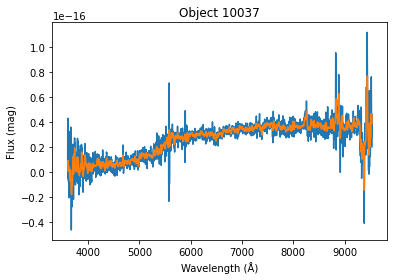

In [6]:
for obj_id in ('1000', '10037'):
    plot_sdss_spectrum(obj_id, 'gal')
    plt.show()


## SDSS SNe

Object type: SNII
Available Spectra: {'Gal', 'II'}


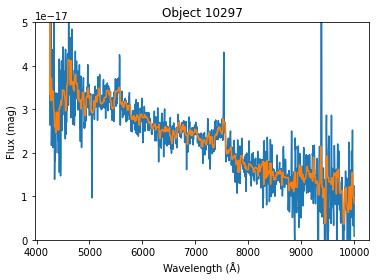

Object type: SNIa
Available Spectra: {'Gal', 'Ia'}


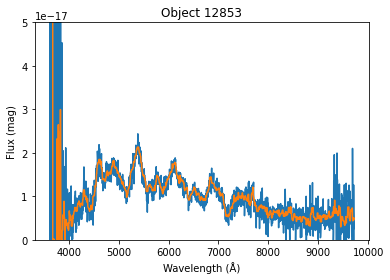

In [7]:
for obj_id in ('10297', '12853'):
    plot_sdss_spectrum(obj_id, 'sn')
    plt.ylim(0, 5E-17)
    plt.show()


## Comparing window sizes

### CSP SN 2005kc

Window size: 5


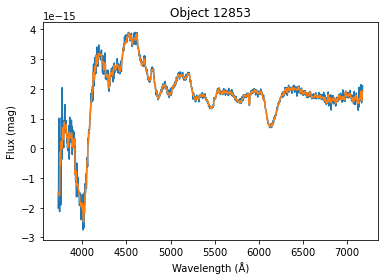

Window size: 10


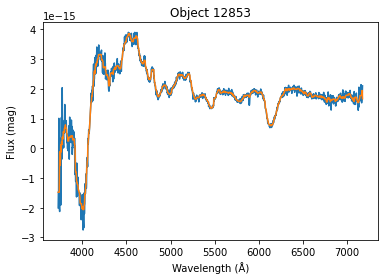

Window size: 20


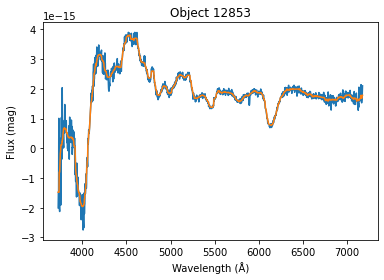

Window size: 100


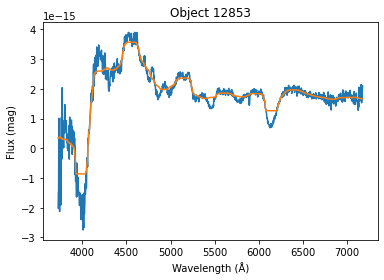

In [8]:
for window in (5, 10, 20, 100):
    print('Window size:', window)
    plot_csp_spectrum('2005kc', window_size=window, time=2453698.58)
    plt.show()
    

### CSP SN 2006os

Window size: 5


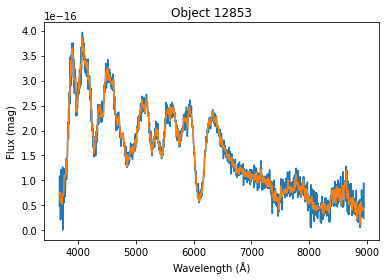

Window size: 10


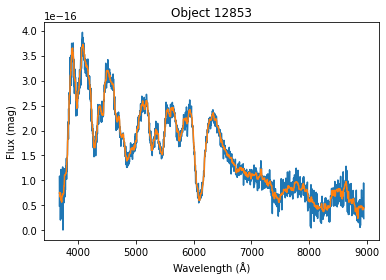

Window size: 20


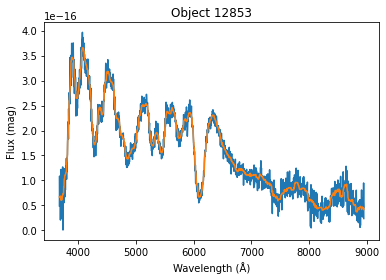

Window size: 100


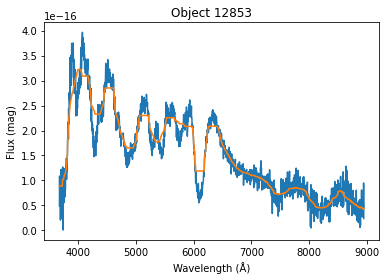

In [9]:
for window in (5, 10, 20, 100):
    print('Window size:', window)
    plot_csp_spectrum('2006os', window_size=window, time=2454061.68)
    plt.show()
    

### SDSS CID 12853

Window size: 5
Object type: SNIa
Available Spectra: {'Gal', 'Ia'}


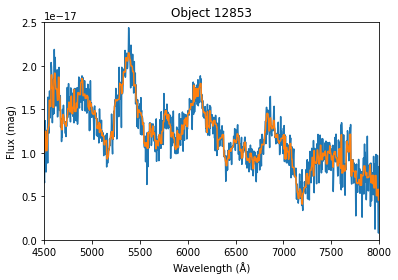

Window size: 10
Object type: SNIa
Available Spectra: {'Gal', 'Ia'}


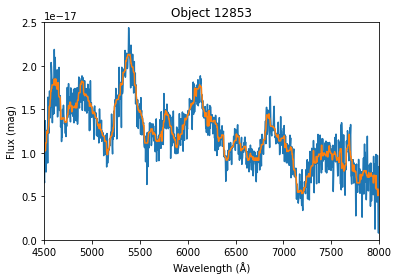

Window size: 20
Object type: SNIa
Available Spectra: {'Gal', 'Ia'}


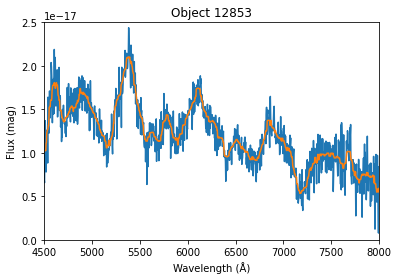

Window size: 100
Object type: SNIa
Available Spectra: {'Gal', 'Ia'}


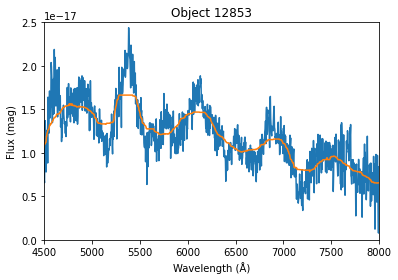

In [10]:
for window in (5, 10, 20, 100):
    print('Window size:', window)
    plot_sdss_spectrum('12853', 'sn', window_size=window)
    plt.ylim(0, 2.5E-17)
    plt.xlim(4500, 8000)
    plt.show()
    